## EDA

In [971]:
# !pip install pandas numpy seaborn
# !pip install matplotlib
# !pip install openpyxl
# !pip install scikit-learn

In [972]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [973]:
data=pd.read_excel("Worksheet in Data Science_Problems_2nd round 2.xlsx")

In [974]:
data.head()

,Grade names,Polymer Types,Primary Filler type,% of Primary filler,Secondary filler type,% of secondary filler,Orientation,Strain Rate(%/s),Temperature,Youngs modulus (MPa),Yield Strain (%),Yield Stress (MPa),Elongation at break (%),Strength at break (MPa),Unnamed: 14,Independent variables
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,L1006,L,1.0,6.0,0,0.0,0.0,0.0833,52.0,4870.0,6.6,89.6,7.4,88.9,NaN,Dependent variables
2,L1006,L,1.0,6.0,0,0.0,0.0,0.0833,107.0,4190.0,7.3,70.0,7.7,69.6,NaN,NaN
3,L1006,L,1.0,6.0,0,0.0,0.0,0.0833,23.0,7270.0,4.0,118.0,5.9,117.0,NaN,Identifier
4,L1006,L,1.0,6.0,0,0.0,0.0,0.0833,121.0,3870.0,10.0,77.6,10.0,77.6,NaN,NaN


In [975]:
data.shape

(430, 16)

In [976]:
data.columns

Index(['Grade names', 'Polymer Types', 'Primary Filler type',
       '% of Primary filler', 'Secondary filler type', '% of secondary filler',
       'Orientation', 'Strain Rate(%/s)', 'Temperature',
       'Youngs modulus (MPa)', 'Yield Strain (%)', 'Yield Stress (MPa)',
       'Elongation at break (%)', 'Strength at break  (MPa)', 'Unnamed: 14',
       'Independent variables'],
      dtype='object')

In [977]:
data.columns=data.columns.str.replace(" ", "_").str.lower().str.replace("%", "percent")

In [978]:
data.columns = data.columns.str.replace(r'(_)?\([^)]*\)', '', regex=True)

In [979]:
data.columns

Index(['grade_names', 'polymer_types', 'primary_filler_type',
       'percent_of_primary_filler', 'secondary_filler_type',
       'percent_of_secondary_filler', 'orientation', 'strain_rate',
       'temperature', 'youngs_modulus', 'yield_strain', 'yield_stress',
       'elongation_at_break', 'strength_at_break_', 'unnamed:_14',
       'independent_variables'],
      dtype='object')

In [980]:
data.drop(['unnamed:_14','independent_variables','grade_names'], axis=1,inplace=True)

In [981]:
data.drop(data.index[0], axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [982]:
data.head()

,polymer_types,primary_filler_type,percent_of_primary_filler,secondary_filler_type,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_
0,L,1.0,6.0,0,0.0,0.0,0.0833,52.0,4870.0,6.6,89.6,7.4,88.9
1,L,1.0,6.0,0,0.0,0.0,0.0833,107.0,4190.0,7.3,70.0,7.7,69.6
2,L,1.0,6.0,0,0.0,0.0,0.0833,23.0,7270.0,4.0,118.0,5.9,117.0
3,L,1.0,6.0,0,0.0,0.0,0.0833,121.0,3870.0,10.0,77.6,10.0,77.6
4,L,1.0,6.0,0,0.0,0.0,0.0833,107.0,6530.0,10.1,84.1,10.1,84.1


In [983]:
data.columns

Index(['polymer_types', 'primary_filler_type', 'percent_of_primary_filler',
       'secondary_filler_type', 'percent_of_secondary_filler', 'orientation',
       'strain_rate', 'temperature', 'youngs_modulus', 'yield_strain',
       'yield_stress', 'elongation_at_break', 'strength_at_break_'],
      dtype='object')

In [984]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   polymer_types                429 non-null    object 
 1   primary_filler_type          429 non-null    float64
 2   percent_of_primary_filler    426 non-null    float64
 3   secondary_filler_type        429 non-null    object 
 4   percent_of_secondary_filler  412 non-null    float64
 5   orientation                  429 non-null    float64
 6   strain_rate                  429 non-null    float64
 7   temperature                  429 non-null    float64
 8   youngs_modulus               428 non-null    float64
 9   yield_strain                 427 non-null    float64
 10  yield_stress                 428 non-null    float64
 11  elongation_at_break          427 non-null    float64
 12  strength_at_break_           428 non-null    float64
dtypes: float64(11), obje

In [985]:
data.isnull().sum()

polymer_types                   0
primary_filler_type             0
percent_of_primary_filler       3
secondary_filler_type           0
percent_of_secondary_filler    17
orientation                     0
strain_rate                     0
temperature                     0
youngs_modulus                  1
yield_strain                    2
yield_stress                    1
elongation_at_break             2
strength_at_break_              1
dtype: int64

In [986]:
for col in data.columns:
    print(col,": ", data[col].nunique())

polymer_types :  12
primary_filler_type :  3
percent_of_primary_filler :  13
secondary_filler_type :  5
percent_of_secondary_filler :  6
orientation :  3
strain_rate :  11
temperature :  41
youngs_modulus :  253
yield_strain :  306
yield_stress :  295
elongation_at_break :  339
strength_at_break_ :  308


In [987]:
cols=['polymer_types','primary_filler_type','secondary_filler_type','percent_of_secondary_filler','orientation']
for col in cols:
    print(col,": ", data[col].unique())

polymer_types :  ['L' 'M' 'F' 'W' 'X' 'A' 'AA' 'S' 'XX' 'PR' 'H' 'CY']
primary_filler_type :  [1. 2. 0.]
secondary_filler_type :  [0 2 3 'P' 1]
percent_of_secondary_filler :  [0.  nan 4.  3.  1.  1.4 2. ]
orientation :  [ 0. 45. 90.]


In [988]:
data[data['secondary_filler_type']=="P"].shape # 13 rows have 'P' as secondary_filler_type

(13, 13)

In [989]:
data[['primary_filler_type']] = data[['primary_filler_type']].astype(str).apply(lambda x: x.str.replace('.0', ''))

In [990]:
df=data.copy()

In [991]:
df.describe()

,percent_of_primary_filler,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_
count,426.000000,412.000000,429.000000,429.000000,429.000000,428.000000,427.000000,428.000000,427.000000,428.000000
mean,2.152113,0.209709,0.839161,11.412170,43.156177,5689.282570,6.994333,80.817126,41.806169,78.160584
std,3.021174,0.752678,8.095213,89.895071,49.386861,5707.299646,14.676442,48.180093,47.360811,49.655045
min,0.000000,0.000000,0.000000,0.000100,-60.000000,1.860000,0.000000,0.000000,0.500000,1.850000
25%,0.000000,0.000000,0.000000,0.083300,23.000000,2247.500000,2.400000,53.000000,2.569000,47.775000
50%,0.000000,0.000000,0.000000,0.083300,23.000000,2665.000000,4.410000,65.400000,10.000000,61.900000
75%,5.000000,0.000000,0.000000,0.833000,75.000000,7937.500000,6.320000,94.700000,83.615000,93.850000
max,10.000000,4.000000,90.000000,833.300000,176.000000,32200.000000,151.000000,276.000000,158.000000,276.000000


In [992]:
df.columns

Index(['polymer_types', 'primary_filler_type', 'percent_of_primary_filler',
       'secondary_filler_type', 'percent_of_secondary_filler', 'orientation',
       'strain_rate', 'temperature', 'youngs_modulus', 'yield_strain',
       'yield_stress', 'elongation_at_break', 'strength_at_break_'],
      dtype='object')

In [993]:
# !pip install statsmodels

In [994]:
df.sample(10)

,polymer_types,primary_filler_type,percent_of_primary_filler,secondary_filler_type,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_
86,X,1,8.0,0,0.0,0.0,0.0833,23.0,13100.0,1.90,161.0,1.90,161.0
234,X,0,0.0,0,0.0,0.0,0.0833,-40.0,2880.0,7.56,91.2,18.01,75.3
158,H,2,6.0,1,2.0,0.0,0.0833,90.0,32200.0,1.45,193.0,1.45,193.0
30,F,0,0.0,P,NaN,0.0,0.8330,23.0,2370.0,27.80,38.0,27.80,38.0
226,X,0,0.0,0,0.0,0.0,0.0833,120.0,2330.0,3.56,47.3,80.86,42.2
345,X,0,0.0,0,0.0,0.0,0.8330,66.0,1840.0,4.40,46.5,4.40,46.5
108,A,1,4.0,0,0.0,0.0,0.0833,90.0,5760.0,1.60,58.0,1.60,58.0
188,X,0,0.0,0,0.0,0.0,0.0833,-40.0,2610.0,8.24,81.8,123.00,79.8
22,F,2,3.0,0,0.0,0.0,0.0833,150.0,3870.0,3.20,42.5,3.20,42.5
299,X,0,0.0,0,0.0,0.0,0.8330,23.0,2270.0,5.71,57.8,77.49,49.4


### Univariate Analysis

In [995]:
df.dtypes

polymer_types                   object
primary_filler_type             object
percent_of_primary_filler      float64
secondary_filler_type           object
percent_of_secondary_filler    float64
orientation                    float64
strain_rate                    float64
temperature                    float64
youngs_modulus                 float64
yield_strain                   float64
yield_stress                   float64
elongation_at_break            float64
strength_at_break_             float64
dtype: object

In [996]:
cat_cols=df.select_dtypes(include='object').columns

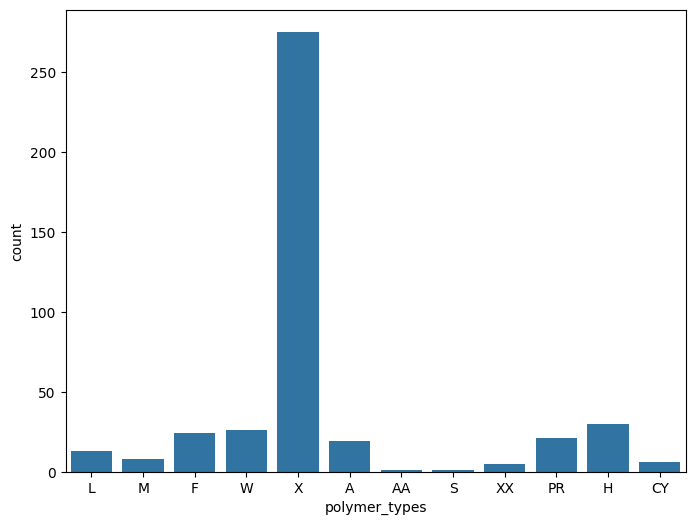

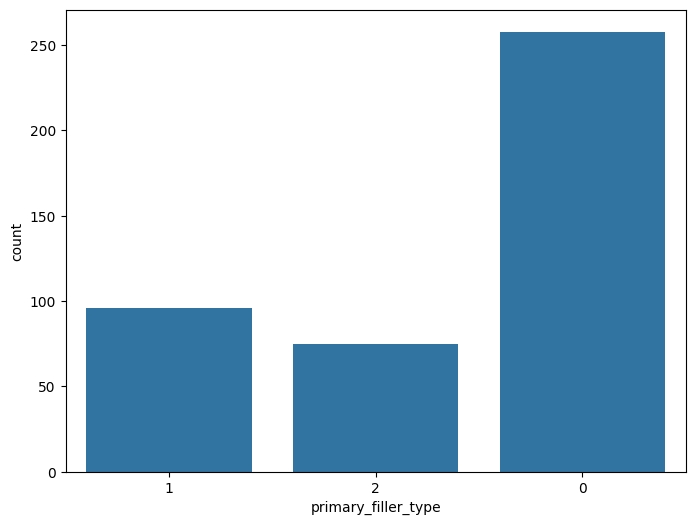

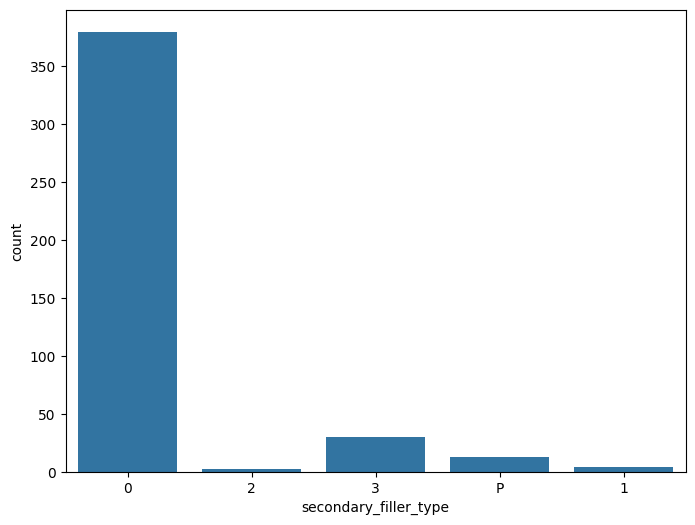

In [997]:
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col], data=df)
    

Huge imbalance among the classes can be observed

In [998]:
num_cols=df.select_dtypes(include=['float64']).columns

In [999]:
for col in num_cols:
    print(col, " :",df[col].nunique())

percent_of_primary_filler  : 13
percent_of_secondary_filler  : 6
orientation  : 3
strain_rate  : 11
temperature  : 41
youngs_modulus  : 253
yield_strain  : 306
yield_stress  : 295
elongation_at_break  : 339
strength_at_break_  : 308


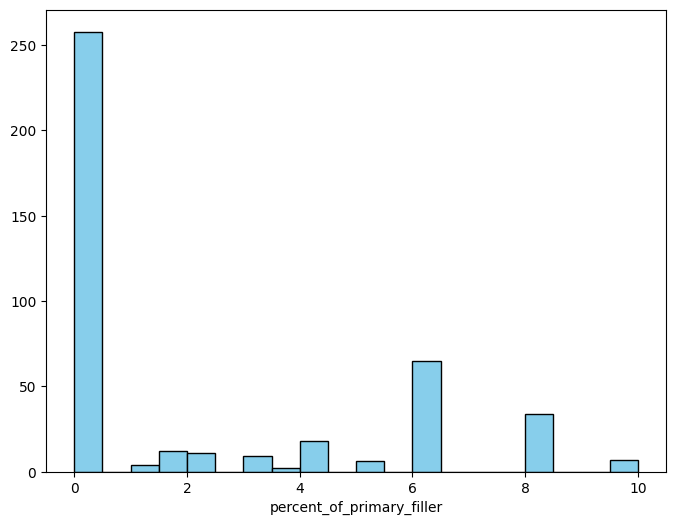

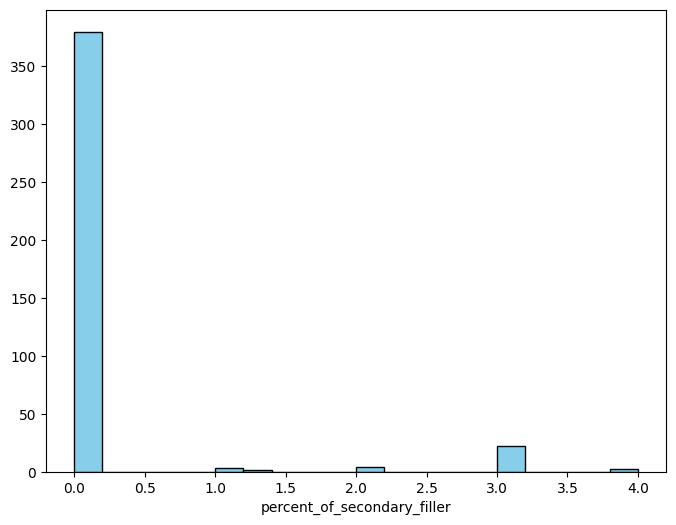

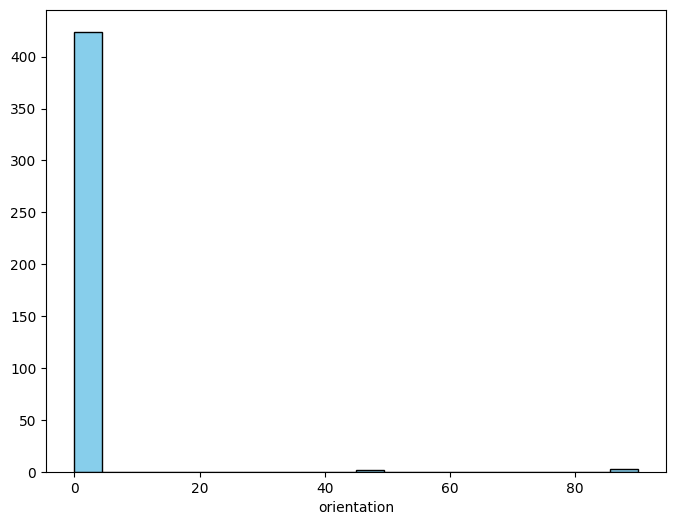

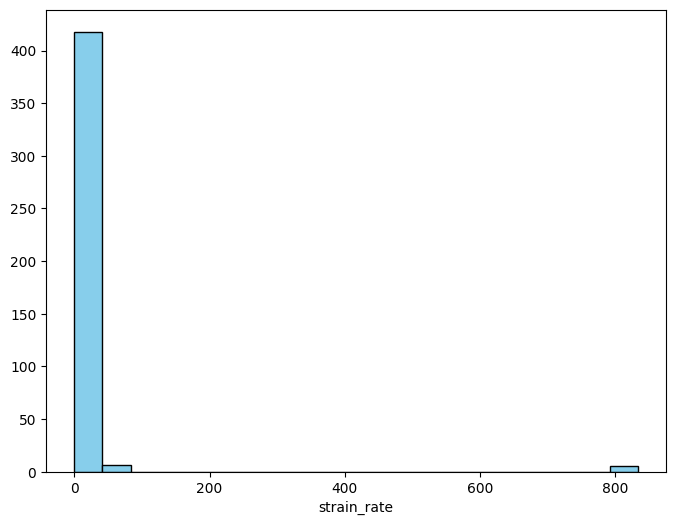

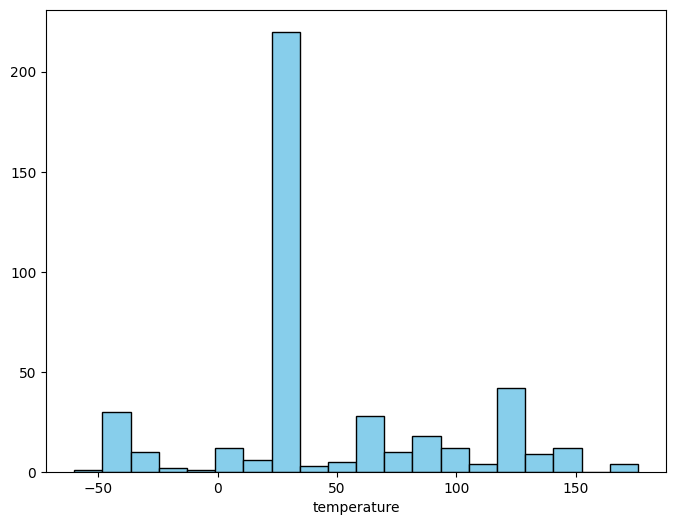

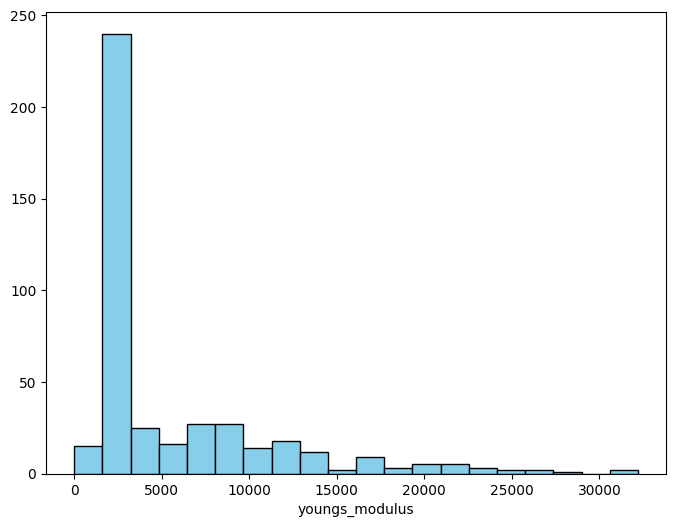

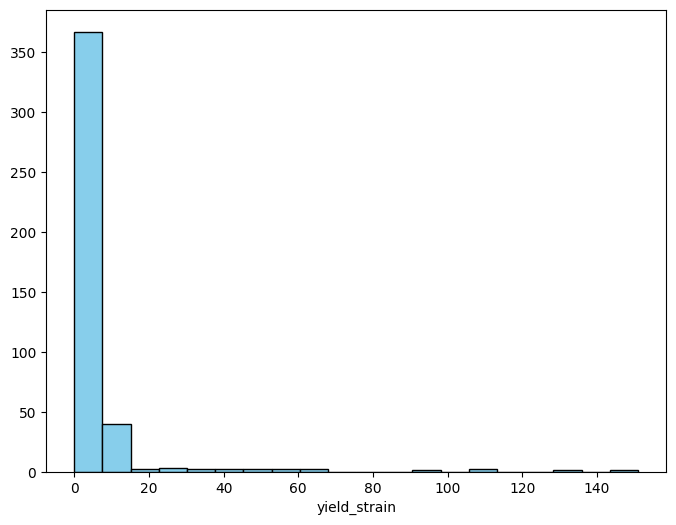

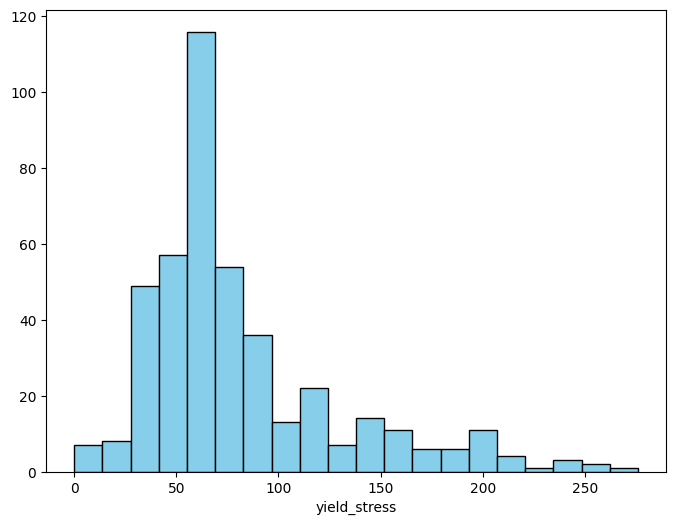

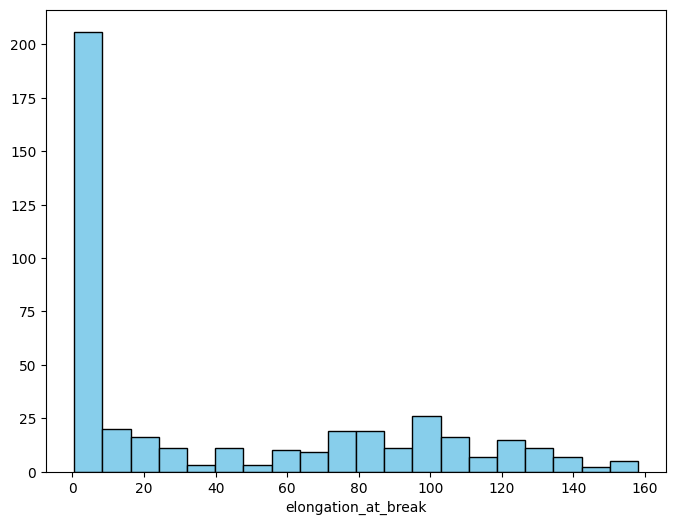

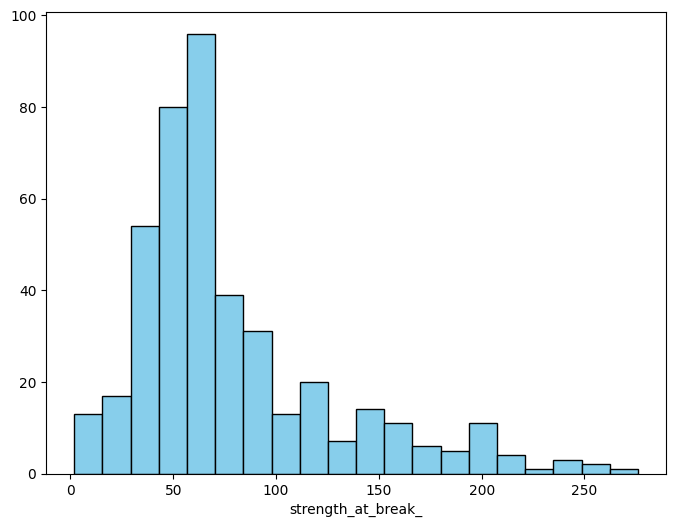

In [1000]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    num_bins = int(np.sqrt(len(df[col])))
#     print(num_bins)
    plt.hist(df[col], bins=num_bins, color='skyblue', edgecolor='black')
    plt.xlabel(col)

Data Highly skewed/non-uniform

### Bivariate

In [1001]:
df.head()

,polymer_types,primary_filler_type,percent_of_primary_filler,secondary_filler_type,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_
0,L,1,6.0,0,0.0,0.0,0.0833,52.0,4870.0,6.6,89.6,7.4,88.9
1,L,1,6.0,0,0.0,0.0,0.0833,107.0,4190.0,7.3,70.0,7.7,69.6
2,L,1,6.0,0,0.0,0.0,0.0833,23.0,7270.0,4.0,118.0,5.9,117.0
3,L,1,6.0,0,0.0,0.0,0.0833,121.0,3870.0,10.0,77.6,10.0,77.6
4,L,1,6.0,0,0.0,0.0,0.0833,107.0,6530.0,10.1,84.1,10.1,84.1


In [1002]:
num_data=df.select_dtypes(include=['float64','int32'])


#### Linear correlation matrix

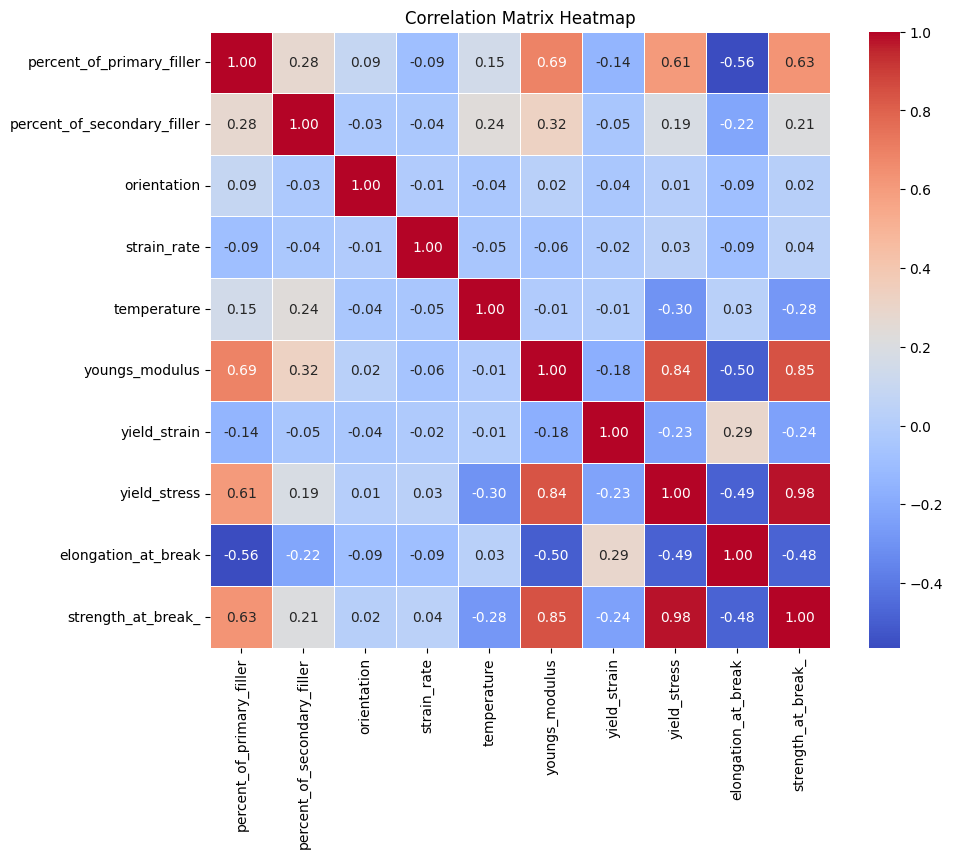

In [1003]:
corr_matrix = num_data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


* yeild_stress and strength_at_break and youngs_modulus have very high correlation
* percent_of_primary_filler and youngs_modulus have high correlation
* No strong correlation between dependent and independent features

In [1004]:
df.dtypes

polymer_types                   object
primary_filler_type             object
percent_of_primary_filler      float64
secondary_filler_type           object
percent_of_secondary_filler    float64
orientation                    float64
strain_rate                    float64
temperature                    float64
youngs_modulus                 float64
yield_strain                   float64
yield_stress                   float64
elongation_at_break            float64
strength_at_break_             float64
dtype: object

#### Range of Primary and Secondary filler %

In [1005]:
print("minimum primary :% ",min(df.percent_of_primary_filler),"Maximum primary :% ", max(df.percent_of_primary_filler))

minimum primary :%  0.0 Maximum primary :%  10.0


In [1006]:
print("minimum primary :% ",min(df.percent_of_secondary_filler),"Maximum primary :% ", max(df.percent_of_secondary_filler))

minimum primary :%  0.0 Maximum primary :%  4.0


Primary % is added is more quantity and to more products

#### How many had no filler type

In [1007]:
df.dtypes

polymer_types                   object
primary_filler_type             object
percent_of_primary_filler      float64
secondary_filler_type           object
percent_of_secondary_filler    float64
orientation                    float64
strain_rate                    float64
temperature                    float64
youngs_modulus                 float64
yield_strain                   float64
yield_stress                   float64
elongation_at_break            float64
strength_at_break_             float64
dtype: object

In [1008]:
df[(df['percent_of_primary_filler'] == 0) & (df['percent_of_secondary_filler'] == 0)].shape

(241, 13)

In more than 50% of the records, there are no primary or secondary fillers used

#### How many products with both filler types

In [1009]:
df[(df['percent_of_primary_filler'] != 0) & (df['percent_of_secondary_filler'] != 0)].shape

(32, 13)

In [1010]:
# df[(df['percent_of_primary_filler'] != 0) & (df['percent_of_secondary_filler'] != 0)]

There are very few records <30 with both types of fillers

#### How many products with only Primary filler type

In [1011]:
df[(df['percent_of_primary_filler'] != 0) & (df['percent_of_secondary_filler'] == 0)].shape

(139, 13)

#### How many products with only Sec filler type

In [1012]:
df[(df['percent_of_primary_filler'] == 0) & (df['percent_of_secondary_filler'] != 0)].shape

(17, 13)

#### Relationship among Independent variables

In [1013]:
df['percent_of_primary_filler_flag']=df['percent_of_primary_filler'].apply(lambda x: 0 if x==0 else 1)
df['percent_of_secondary_filler_flag']=df['percent_of_secondary_filler'].apply(lambda x: 0 if x==0 else 1)

([<matplotlib.axis.XTick at 0x19eac952c60>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'AA'),
  Text(2, 0, 'CY'),
  Text(3, 0, 'F'),
  Text(4, 0, 'H'),
  Text(5, 0, 'L'),
  Text(6, 0, 'M'),
  Text(7, 0, 'PR'),
  Text(8, 0, 'S'),
  Text(9, 0, 'W'),
  Text(10, 0, 'X'),
  Text(11, 0, 'XX')])

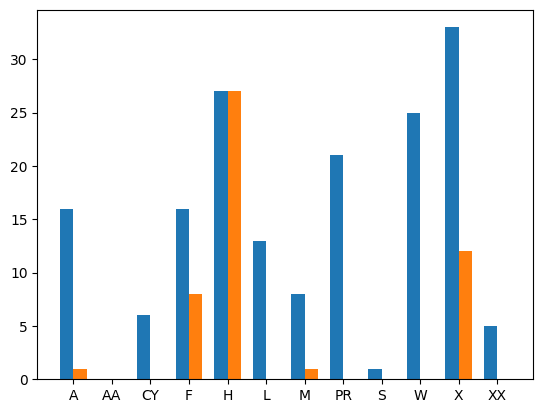

In [1014]:
grouped_data1=df.groupby(by='polymer_types')['percent_of_primary_filler_flag'].sum()
grouped_data2=df.groupby(by='polymer_types')['percent_of_secondary_filler_flag'].sum()

fig, ax = plt.subplots()
x = np.arange(len(grouped_data1))  # the label locations
width = 0.35  # the width of the bars

# Plotting bars for grouped_data1
ax.bar(x - width/2, grouped_data1.values, width, label='Primary Filler Flag')

# Plotting bars for grouped_data2
ax.bar(x + width/2, grouped_data2.values, width, label='Secondary Filler Flag')

plt.xticks(x, grouped_data1.index)


Primary filler is used a lot more than secondary

In [1015]:
df.strain_rate.nunique()

11

#### Strain Rate Analysis

In [1016]:
df.groupby(by=[df.polymer_types,df.primary_filler_type,df.secondary_filler_type,df.strain_rate,])['strain_rate'].count()

polymer_types  primary_filler_type  secondary_filler_type  strain_rate
A              0                    0                      0.08330          2
                                    P                      0.08330          1
               1                    0                      0.08330          6
               2                    0                      0.08330         10
AA             0                    0                      0.08330          1
CY             2                    0                      0.08330          6
F              0                    0                      0.08330          1
                                                           0.83300          1
                                                           8.33000          1
                                    3                      0.08330          2
                                    P                      0.08330          1
                                                           0.83300     

For majority of the polymers, strain_rate has been .08

#### Strain rate Vs Orientation

In [1017]:
df.groupby(by=['percent_of_primary_filler','percent_of_secondary_filler','orientation','strain_rate'])['strain_rate'].count()

percent_of_primary_filler  percent_of_secondary_filler  orientation  strain_rate
0.0                        0.0                          0.0          0.08330        107
                                                                     0.08333          1
                                                                     0.80000          4
                                                                     0.83300         70
                                                                     0.83330         35
                                                                     0.88300          1
                                                                     8.33000         11
                                                                     8.33300          1
                                                                     83.33000         6
                                                                     833.30000        5
                           1.4         

Highest strain rate is for X polymer with 0 percent_of_primary_filler and percent_of_secondary_filler and 0 orientation

#### Polymer Vs Orientation

In [1018]:
df.groupby(by=['polymer_types','orientation'])['orientation'].count()

polymer_types  orientation
A              0.0             19
AA             0.0              1
CY             0.0              5
               90.0             1
F              0.0             24
H              0.0             30
L              0.0             13
M              0.0              8
PR             0.0             21
S              0.0              1
W              0.0             22
               45.0             2
               90.0             2
X              0.0            275
XX             0.0              5
Name: orientation, dtype: int64

For most of the polymers, zero orientation is used

In [1019]:
temp.columns

Index(['pred', 'actual'], dtype='object')

In [1020]:
temp=pd.DataFrame(df.groupby(by=['temperature','strain_rate'])['strain_rate'].count())
temp.rename(columns={'strain_rate':'count'},inplace=True)
temp.reset_index(inplace=True)

In [1021]:
temp[temp['strain_rate']==max(temp['strain_rate'])]

,temperature,strain_rate,count
22,23.0,833.3,5


In [1022]:
temp[temp['strain_rate']==min(temp['strain_rate'])]

,temperature,strain_rate,count
12,23.0,0.0001,3
32,60.0,0.0001,1


temperature alone doesn't seem to have much impact on the strain rate

In [1023]:
df.columns

Index(['polymer_types', 'primary_filler_type', 'percent_of_primary_filler',
       'secondary_filler_type', 'percent_of_secondary_filler', 'orientation',
       'strain_rate', 'temperature', 'youngs_modulus', 'yield_strain',
       'yield_stress', 'elongation_at_break', 'strength_at_break_',
       'percent_of_primary_filler_flag', 'percent_of_secondary_filler_flag'],
      dtype='object')

In [1024]:
df.sample(7)

,polymer_types,primary_filler_type,percent_of_primary_filler,secondary_filler_type,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_,percent_of_primary_filler_flag,percent_of_secondary_filler_flag
383,X,0,0.0,0,0.0,0.0,0.8333,135.0,1850.0,2.41,29.4,21.70,14.0,0,0
352,X,0,0.0,0,0.0,0.0,0.8330,23.0,2180.0,5.97,55.4,91.72,57.0,0,0
92,X,1,10.0,0,0.0,0.0,0.0833,120.0,7830.0,0.50,41.0,0.50,41.0,1,0
326,X,0,0.0,0,0.0,0.0,83.3300,23.0,2710.0,7.12,72.9,7.12,72.9,0,0
263,X,0,0.0,0,0.0,0.0,0.0833,-40.0,2340.0,8.14,73.4,80.12,78.6,0,0
247,X,0,0.0,0,0.0,0.0,0.8330,-40.0,2920.0,8.70,80.5,77.80,78.5,0,0
171,H,2,6.0,3,3.0,0.0,0.0833,150.0,8280.0,3.95,68.2,3.95,68.2,1,1


#### Does primary filler type=0 means % of primary filler=0? Is this correct for Secondary filler type?

In [1025]:
df.columns

Index(['polymer_types', 'primary_filler_type', 'percent_of_primary_filler',
       'secondary_filler_type', 'percent_of_secondary_filler', 'orientation',
       'strain_rate', 'temperature', 'youngs_modulus', 'yield_strain',
       'yield_stress', 'elongation_at_break', 'strength_at_break_',
       'percent_of_primary_filler_flag', 'percent_of_secondary_filler_flag'],
      dtype='object')

In [1026]:
df[(df.primary_filler_type==0) & (df.percent_of_primary_filler!=0)] #yes, that's correct, primary filler type=0 means % of primary filler=0

,polymer_types,primary_filler_type,percent_of_primary_filler,secondary_filler_type,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_,percent_of_primary_filler_flag,percent_of_secondary_filler_flag


In [1027]:
df[(df.secondary_filler_type==0) & (df.percent_of_secondary_filler!=0)] #yes, that's correct, sec filler type=0 means % of sec filler=0

,polymer_types,primary_filler_type,percent_of_primary_filler,secondary_filler_type,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_,percent_of_primary_filler_flag,percent_of_secondary_filler_flag


##### If primary or sec. type is 0, it means it's percent is also zero

#### Polymer type Vs primary & filler type

Text(95.72222222222221, 0.5, 'polymer_types')

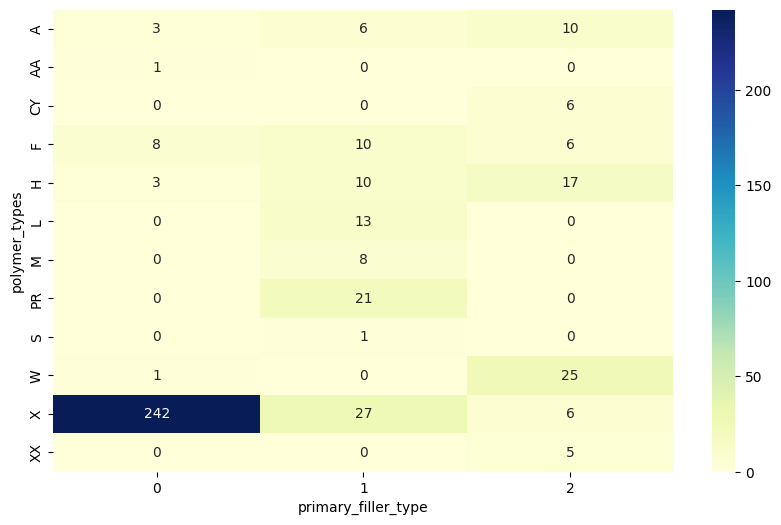

In [1028]:
cross_tab = pd.crosstab(index=df['polymer_types'], columns=df['primary_filler_type'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='g')  # annot=True to display counts, fmt='g' to remove scientific notation
plt.xlabel('primary_filler_type')
plt.ylabel('polymer_types')


In [1029]:
val_cnt=df.polymer_types.value_counts().reset_index()

In [1030]:
val_cnt

,polymer_types,count
0,X,275
1,H,30
2,W,26
3,F,24
4,PR,21
5,A,19
6,L,13
7,M,8
8,CY,6
9,XX,5


In [1031]:
normalize=pd.DataFrame(df.groupby(by=['polymer_types','primary_filler_type'])['primary_filler_type'].count())
normalize.rename(columns={'primary_filler_type':'cnt'},inplace=True)
normalize.reset_index(inplace=True)


In [1032]:
merged=normalize.merge(val_cnt,on='polymer_types')
merged['norm']=merged['cnt']/merged['count']*100

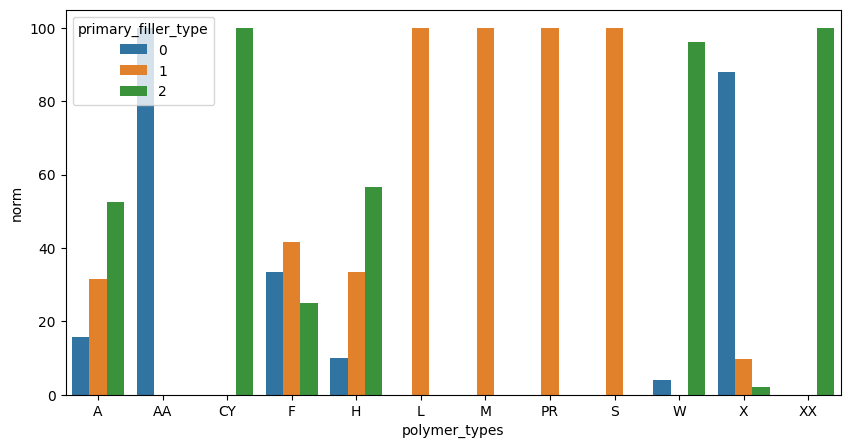

In [1033]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
# Example of a bar plot with two categorical variables and one numerical variable
sns.barplot(data=merged, x='polymer_types', y='norm', hue='primary_filler_type')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')

plt.show()


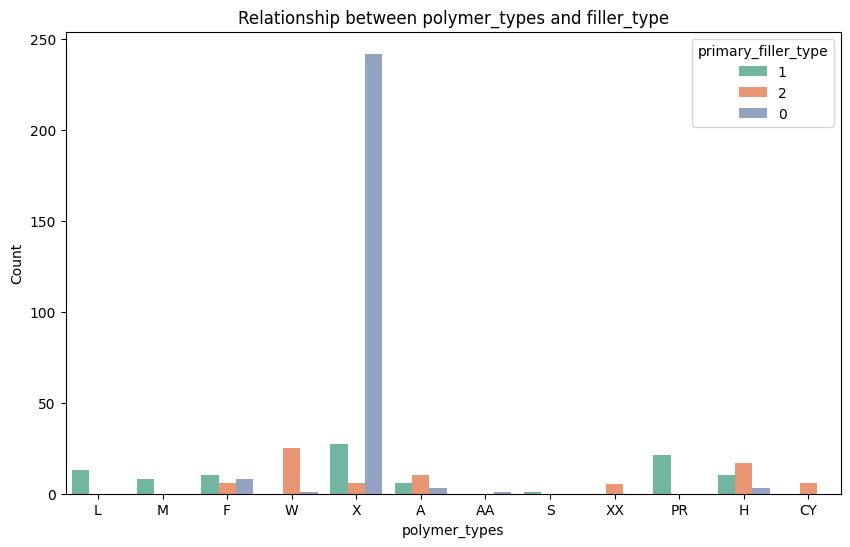

Text(0.5, 0, 'polymer_types')

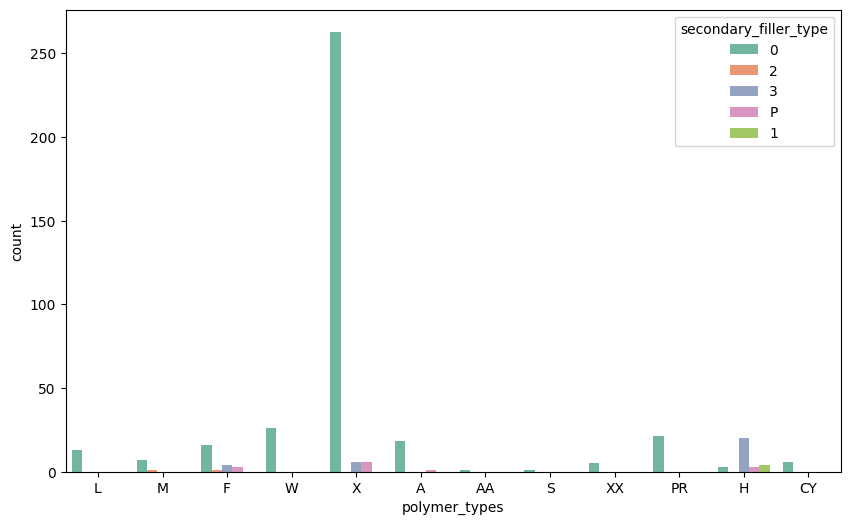

In [1034]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='polymer_types', hue='primary_filler_type', palette='Set2')
plt.xlabel('polymer_types')
plt.ylabel('Count')
plt.title('Relationship between polymer_types and filler_type')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='polymer_types', hue='secondary_filler_type', palette='Set2')
plt.xlabel('polymer_types')

In [1035]:
data.head()

,polymer_types,primary_filler_type,percent_of_primary_filler,secondary_filler_type,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_
0,L,1,6.0,0,0.0,0.0,0.0833,52.0,4870.0,6.6,89.6,7.4,88.9
1,L,1,6.0,0,0.0,0.0,0.0833,107.0,4190.0,7.3,70.0,7.7,69.6
2,L,1,6.0,0,0.0,0.0,0.0833,23.0,7270.0,4.0,118.0,5.9,117.0
3,L,1,6.0,0,0.0,0.0,0.0833,121.0,3870.0,10.0,77.6,10.0,77.6
4,L,1,6.0,0,0.0,0.0,0.0833,107.0,6530.0,10.1,84.1,10.1,84.1


polymer_types vs primary filler type and percentage

#### Polymer type Vs Primary Filler type Vs % of Primary filler

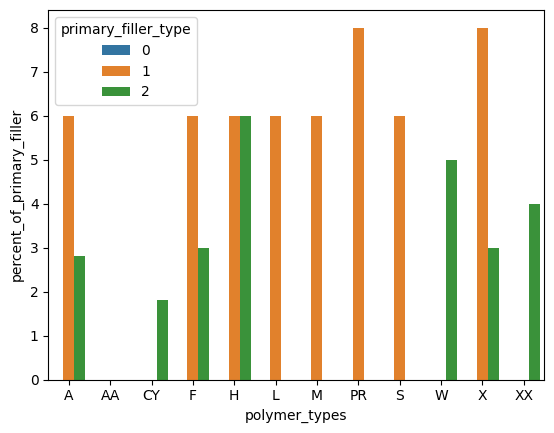

In [1036]:
aggregated_data = df.groupby(['polymer_types','primary_filler_type'])['percent_of_primary_filler'].median().reset_index()

# Example of a bar plot with aggregated numerical data
sns.barplot(data=aggregated_data, x='polymer_types', y='percent_of_primary_filler', hue='primary_filler_type')
plt.show()

#### Polymer type Vs Sec Filler type Vs % of Sec filler

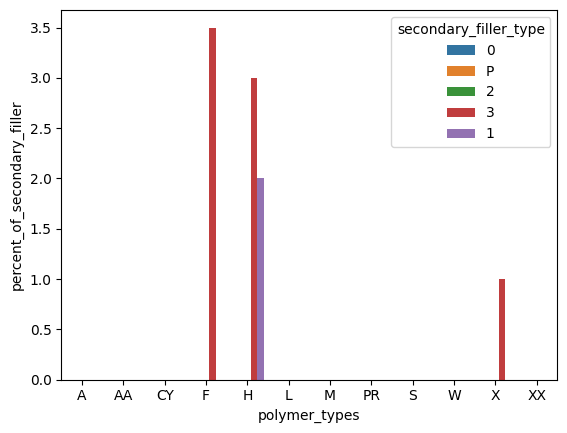

In [1037]:
aggregated_data = df.groupby(['polymer_types','secondary_filler_type'])['percent_of_secondary_filler'].median().reset_index()

# Example of a bar plot with aggregated numerical data
sns.barplot(data=aggregated_data, x='polymer_types', y='percent_of_secondary_filler', hue='secondary_filler_type')
plt.show()

#### Polymer type Vs Strain Rate

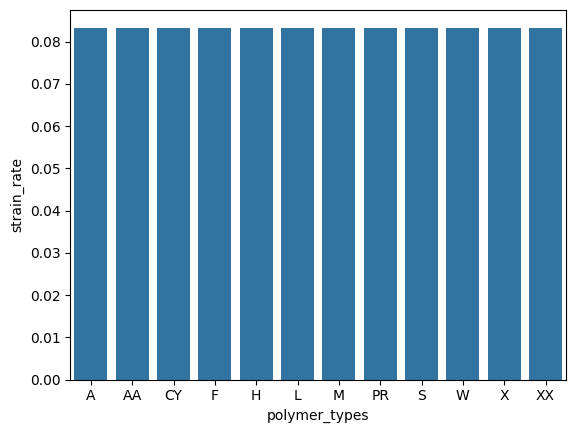

In [1038]:
aggregated_data = df.groupby(['polymer_types'])['strain_rate'].median().reset_index()

# Example of a bar plot with aggregated numerical data
sns.barplot(data=aggregated_data, x='polymer_types', y='strain_rate')
plt.show()

#### Polymer type Vs temperature

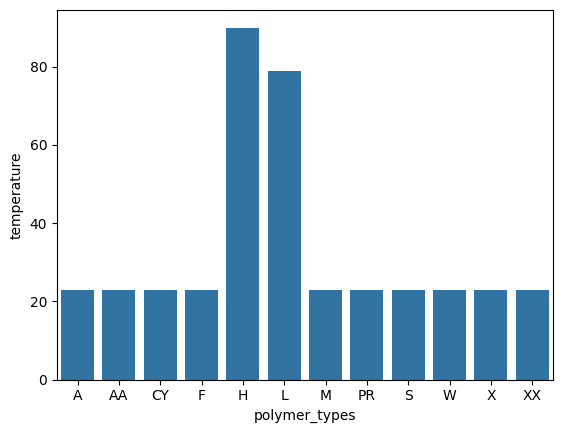

In [1039]:
aggregated_data = df.groupby(['polymer_types'])['temperature'].median().reset_index()

# Example of a bar plot with aggregated numerical data
sns.barplot(data=aggregated_data, x='polymer_types', y='temperature')
plt.show()

H and L had high Median temperatures 

#### When is the temperature Extreme

In [1040]:
df[df.temperature==max(df.temperature)]

,polymer_types,primary_filler_type,percent_of_primary_filler,secondary_filler_type,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_,percent_of_primary_filler_flag,percent_of_secondary_filler_flag
125,XX,2,4.0,0,0.0,0.0,0.0833,176.0,4490.0,5.2,41.8,5.4,41.6,1,0


In [1041]:
df[df.temperature==min(df.temperature)]

,polymer_types,primary_filler_type,percent_of_primary_filler,secondary_filler_type,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_,percent_of_primary_filler_flag,percent_of_secondary_filler_flag
273,X,1,1.2,0,0.0,0.0,0.0833,-60.0,3350.0,6.62,96.3,8.34,91.3,1,0


#### Primary Vs Sec filler type

Text(95.72222222222221, 0.5, 'primary_filler_type')

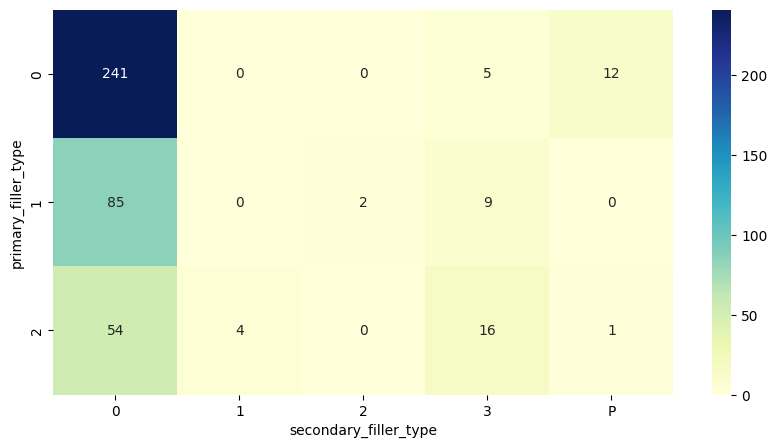

In [1042]:
cross_tab = pd.crosstab(index=df['primary_filler_type'], columns=df['secondary_filler_type'])

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='g')  # annot=True to display counts, fmt='g' to remove scientific notation
plt.xlabel('secondary_filler_type')
plt.ylabel('primary_filler_type')


For most of the records, both are 0. In significant no of records, only primary filler type is used

#### Primary Filler % Vs sec filler %

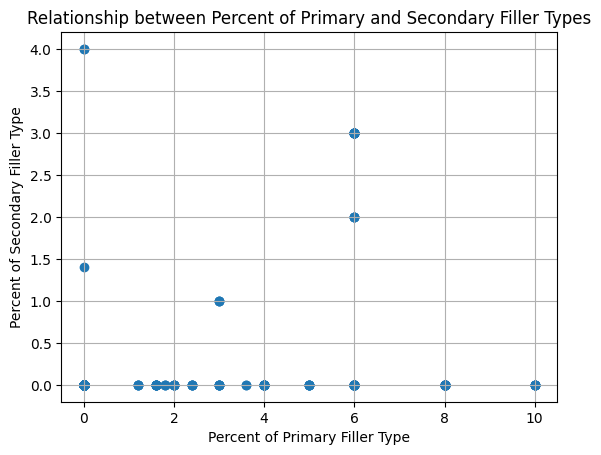

In [1043]:
import matplotlib.pyplot as plt

# Example of a scatter plot
plt.scatter(df['percent_of_primary_filler'], df['percent_of_secondary_filler'])
plt.xlabel('Percent of Primary Filler Type')
plt.ylabel('Percent of Secondary Filler Type')
plt.title('Relationship between Percent of Primary and Secondary Filler Types')
plt.grid(True)
plt.show()


### Feature Enegineering

In [1044]:
df.head()

,polymer_types,primary_filler_type,percent_of_primary_filler,secondary_filler_type,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_,percent_of_primary_filler_flag,percent_of_secondary_filler_flag
0,L,1,6.0,0,0.0,0.0,0.0833,52.0,4870.0,6.6,89.6,7.4,88.9,1,0
1,L,1,6.0,0,0.0,0.0,0.0833,107.0,4190.0,7.3,70.0,7.7,69.6,1,0
2,L,1,6.0,0,0.0,0.0,0.0833,23.0,7270.0,4.0,118.0,5.9,117.0,1,0
3,L,1,6.0,0,0.0,0.0,0.0833,121.0,3870.0,10.0,77.6,10.0,77.6,1,0
4,L,1,6.0,0,0.0,0.0,0.0833,107.0,6530.0,10.1,84.1,10.1,84.1,1,0


In [1045]:
df.dtypes

polymer_types                        object
primary_filler_type                  object
percent_of_primary_filler           float64
secondary_filler_type                object
percent_of_secondary_filler         float64
orientation                         float64
strain_rate                         float64
temperature                         float64
youngs_modulus                      float64
yield_strain                        float64
yield_stress                        float64
elongation_at_break                 float64
strength_at_break_                  float64
percent_of_primary_filler_flag        int64
percent_of_secondary_filler_flag      int64
dtype: object

In [1046]:
df.drop(columns=['percent_of_primary_filler_flag','percent_of_secondary_filler_flag'], axis=1,inplace=True)

In [1047]:
df.isnull().sum()

polymer_types                   0
primary_filler_type             0
percent_of_primary_filler       3
secondary_filler_type           0
percent_of_secondary_filler    17
orientation                     0
strain_rate                     0
temperature                     0
youngs_modulus                  1
yield_strain                    2
yield_stress                    1
elongation_at_break             2
strength_at_break_              1
dtype: int64

since percent_of_secondary_filler has most of the values as 0 and imputing it with median/mean won't make sense as the values are zero, I drop the rows for NaN values

In [1048]:
df.dropna(subset=['percent_of_secondary_filler'], inplace=True)

In [1049]:
df.isnull().sum()

polymer_types                  0
primary_filler_type            0
percent_of_primary_filler      0
secondary_filler_type          0
percent_of_secondary_filler    0
orientation                    0
strain_rate                    0
temperature                    0
youngs_modulus                 1
yield_strain                   2
yield_stress                   1
elongation_at_break            2
strength_at_break_             1
dtype: int64

In [1050]:
df.sample(8)

,polymer_types,primary_filler_type,percent_of_primary_filler,secondary_filler_type,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_
251,X,0,0.0,0,0.0,0.0,0.8330,120.0,803.0,2.90,17.1,2.9,17.1
347,X,0,0.0,0,0.0,0.0,0.8330,23.0,2160.0,6.00,66.4,133.5,66.4
270,X,0,0.0,0,0.0,0.0,0.8330,90.0,1880.0,135.00,43.8,136.5,43.6
342,X,0,0.0,0,0.0,0.0,0.8330,23.0,2040.0,6.20,59.5,121.8,65.2
189,X,0,0.0,0,0.0,0.0,0.0833,-40.0,2700.0,8.02,81.8,103.0,75.5
264,X,0,0.0,0,0.0,0.0,0.8330,90.0,1830.0,3.30,41.0,3.3,41.0
267,X,0,0.0,0,0.0,0.0,0.8330,23.0,2060.0,5.40,55.3,104.4,56.3
192,X,0,0.0,0,0.0,0.0,0.0833,-40.0,2640.0,8.17,81.4,82.2,69.9


#### Combining Primary filler type and %

In [1051]:
df_ohe = pd.get_dummies(df, columns=['primary_filler_type'], drop_first=True,dtype=int,prefix='primary_filler')

In [1052]:
df_ohe['primary_filler_1']=df_ohe['primary_filler_1']*df_ohe['percent_of_primary_filler']
df_ohe['primary_filler_2']=df_ohe['primary_filler_2']*df_ohe['percent_of_primary_filler']

In [1053]:
df_ohe.sample(10)

,polymer_types,percent_of_primary_filler,secondary_filler_type,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_,primary_filler_1,primary_filler_2
383,X,0.0,0,0.0,0.0,0.8333,135.0,1850.0,2.41,29.4,21.70,14.0,0.0,0.0
201,X,0.0,0,0.0,0.0,0.0833,120.0,2180.0,2.61,38.1,145.00,29.1,0.0,0.0
370,X,0.0,0,0.0,0.0,0.0833,-40.0,2640.0,8.42,80.8,57.48,74.2,0.0,0.0
14,M,6.0,0,0.0,0.0,0.0833,23.0,6510.0,5.00,111.0,5.00,111.0,6.0,0.0
271,X,0.0,0,0.0,0.0,0.8330,65.0,1970.0,108.00,45.6,108.20,44.6,0.0,0.0
198,X,0.0,0,0.0,0.0,0.0833,120.0,2060.0,2.67,37.6,137.00,27.8,0.0,0.0
98,X,8.0,0,0.0,0.0,0.0833,23.0,13200.0,2.46,196.0,2.46,196.0,8.0,0.0
39,F,6.0,0,0.0,0.0,0.0833,23.0,9800.0,2.30,122.0,2.30,122.0,6.0,0.0
122,AA,0.0,0,0.0,0.0,0.0833,23.0,3040.0,1.96,37.0,11.30,33.3,0.0,0.0
171,H,6.0,3,3.0,0.0,0.0833,150.0,8280.0,3.95,68.2,3.95,68.2,0.0,6.0


In [1054]:
df_ohe.drop(columns=['percent_of_primary_filler'],axis=1,inplace=True)

#### Combining Secondary filler type and %

<Axes: xlabel='secondary_filler_type', ylabel='count'>

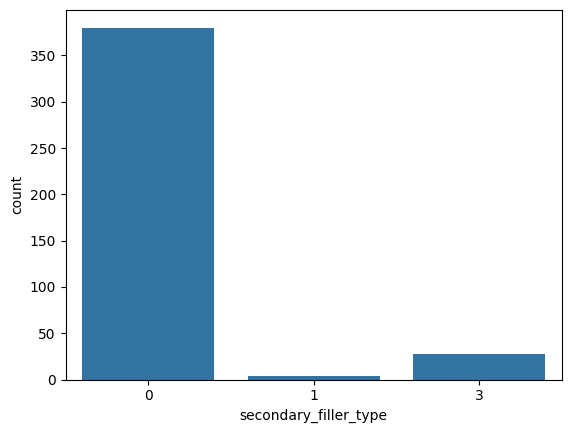

In [1055]:
sns.countplot(data=df_ohe,x='secondary_filler_type') 

We can experiment with droping this column as almost all the values are zero

In [1056]:
dff=pd.get_dummies(df_ohe, columns=['secondary_filler_type'], drop_first=True,dtype=int,prefix='secondary_filler')

In [1057]:
dff['secondary_filler_1']=dff['secondary_filler_1']*dff['percent_of_secondary_filler']
dff['secondary_filler_3']=dff['secondary_filler_3']*dff['percent_of_secondary_filler']

In [1058]:
dff.sample(10)

,polymer_types,percent_of_secondary_filler,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_,primary_filler_1,primary_filler_2,secondary_filler_1,secondary_filler_3
57,W,0.0,0.0,0.0833,120.0,22400.0,0.960,144.00,0.960,144.0,0.0,6.0,0.0,0.0
423,X,0.0,0.0,0.0833,60.0,2260.0,3.310,51.90,78.940,46.5,0.0,0.0,0.0,0.0
3,L,0.0,0.0,0.0833,121.0,3870.0,10.000,77.60,10.000,77.6,6.0,0.0,0.0,0.0
279,X,0.0,0.0,0.0833,15.0,2960.0,6.340,75.70,85.120,77.3,0.0,0.0,0.0,0.0
172,H,3.0,0.0,0.0833,90.0,22600.0,1.370,167.00,1.370,167.0,0.0,6.0,0.0,3.0
54,W,0.0,0.0,0.0833,70.0,20000.0,1.122,190.00,1.122,190.0,0.0,5.0,0.0,0.0
275,X,0.0,0.0,0.0833,100.0,2560.0,55.100,2.72,86.150,36.7,1.2,0.0,0.0,0.0
415,X,0.0,0.0,0.8333,0.0,2460.0,6.040,62.90,52.860,47.7,0.0,0.0,0.0,0.0
213,X,0.0,0.0,0.0833,-40.0,2890.0,7.820,84.70,17.860,66.4,0.0,0.0,0.0,0.0
272,X,0.0,0.0,0.8330,23.0,2170.0,5.930,53.30,100.300,53.4,0.0,0.0,0.0,0.0


In [1059]:
dff.drop(columns=['percent_of_secondary_filler'],axis=1,inplace=True)

In [1060]:
dff.head()

,polymer_types,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_,primary_filler_1,primary_filler_2,secondary_filler_1,secondary_filler_3
0,L,0.0,0.0833,52.0,4870.0,6.6,89.6,7.4,88.9,6.0,0.0,0.0,0.0
1,L,0.0,0.0833,107.0,4190.0,7.3,70.0,7.7,69.6,6.0,0.0,0.0,0.0
2,L,0.0,0.0833,23.0,7270.0,4.0,118.0,5.9,117.0,6.0,0.0,0.0,0.0
3,L,0.0,0.0833,121.0,3870.0,10.0,77.6,10.0,77.6,6.0,0.0,0.0,0.0
4,L,0.0,0.0833,107.0,6530.0,10.1,84.1,10.1,84.1,6.0,0.0,0.0,0.0


In [1061]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dff['polymer_types'] = label_encoder.fit_transform(dff['polymer_types'])
# df['primary_filler_type'] = df['primary_filler_type'].astype('float')
# df['secondary_filler_type'] = df['secondary_filler_type'].astype('float')
# df['primary_filler_type'] = label_encoder.fit_transform(df['primary_filler_type'])
# df['secondary_filler_type'] = label_encoder.fit_transform(df['secondary_filler_type'])
# df['orientation'] = label_encoder.fit_transform(df['secondary_filler_type'])

In [1062]:
dff.head()

,polymer_types,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_,primary_filler_1,primary_filler_2,secondary_filler_1,secondary_filler_3
0,5,0.0,0.0833,52.0,4870.0,6.6,89.6,7.4,88.9,6.0,0.0,0.0,0.0
1,5,0.0,0.0833,107.0,4190.0,7.3,70.0,7.7,69.6,6.0,0.0,0.0,0.0
2,5,0.0,0.0833,23.0,7270.0,4.0,118.0,5.9,117.0,6.0,0.0,0.0,0.0
3,5,0.0,0.0833,121.0,3870.0,10.0,77.6,10.0,77.6,6.0,0.0,0.0,0.0
4,5,0.0,0.0833,107.0,6530.0,10.1,84.1,10.1,84.1,6.0,0.0,0.0,0.0


#### Imputing missing values

In [1063]:
df=dff.copy()

In [1064]:
df.isnull().sum()

polymer_types          0
orientation            0
strain_rate            0
temperature            0
youngs_modulus         1
yield_strain           2
yield_stress           1
elongation_at_break    2
strength_at_break_     1
primary_filler_1       0
primary_filler_2       0
secondary_filler_1     0
secondary_filler_3     0
dtype: int64

Because the distribution of numeric types is skewed and there are hardly any null values, I use median to impute

In [1065]:
num_col = df.select_dtypes(include=['float64'])  
df[num_col.columns] = num_col.fillna(num_col.median())

#### Applying Transformation

In [1066]:
df.head()

,polymer_types,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_,primary_filler_1,primary_filler_2,secondary_filler_1,secondary_filler_3
0,5,0.0,0.0833,52.0,4870.0,6.6,89.6,7.4,88.9,6.0,0.0,0.0,0.0
1,5,0.0,0.0833,107.0,4190.0,7.3,70.0,7.7,69.6,6.0,0.0,0.0,0.0
2,5,0.0,0.0833,23.0,7270.0,4.0,118.0,5.9,117.0,6.0,0.0,0.0,0.0
3,5,0.0,0.0833,121.0,3870.0,10.0,77.6,10.0,77.6,6.0,0.0,0.0,0.0
4,5,0.0,0.0833,107.0,6530.0,10.1,84.1,10.1,84.1,6.0,0.0,0.0,0.0


In [1067]:
df.dtypes

polymer_types            int32
orientation            float64
strain_rate            float64
temperature            float64
youngs_modulus         float64
yield_strain           float64
yield_stress           float64
elongation_at_break    float64
strength_at_break_     float64
primary_filler_1       float64
primary_filler_2       float64
secondary_filler_1     float64
secondary_filler_3     float64
dtype: object

In [1068]:
from sklearn.preprocessing import PowerTransformer
def transform(col):
    pt = PowerTransformer(method='yeo-johnson')
    df[col] = pt.fit_transform((df[col]).values.reshape(-1, 1))

In [1069]:
cols=['orientation','strain_rate',  'temperature']
for col in cols:
    transform(col)

In [1070]:
df.head()

,polymer_types,orientation,strain_rate,temperature,youngs_modulus,yield_strain,yield_stress,elongation_at_break,strength_at_break_,primary_filler_1,primary_filler_2,secondary_filler_1,secondary_filler_3
0,5,-0.110838,-0.678109,0.189692,4870.0,6.6,89.6,7.4,88.9,6.0,0.0,0.0,0.0
1,5,-0.110838,-0.678109,1.241246,4190.0,7.3,70.0,7.7,69.6,6.0,0.0,0.0,0.0
2,5,-0.110838,-0.678109,-0.378553,7270.0,4.0,118.0,5.9,117.0,6.0,0.0,0.0,0.0
3,5,-0.110838,-0.678109,1.505597,3870.0,10.0,77.6,10.0,77.6,6.0,0.0,0.0,0.0
4,5,-0.110838,-0.678109,1.241246,6530.0,10.1,84.1,10.1,84.1,6.0,0.0,0.0,0.0


In [1071]:
temp=df.copy()

In [1072]:
targets=['youngs_modulus','yield_strain','yield_stress','elongation_at_break','strength_at_break_']

In [1073]:
df.drop(columns=targets,axis=1,inplace=True)

In [1074]:
df.head()

,polymer_types,orientation,strain_rate,temperature,primary_filler_1,primary_filler_2,secondary_filler_1,secondary_filler_3
0,5,-0.110838,-0.678109,0.189692,6.0,0.0,0.0,0.0
1,5,-0.110838,-0.678109,1.241246,6.0,0.0,0.0,0.0
2,5,-0.110838,-0.678109,-0.378553,6.0,0.0,0.0,0.0
3,5,-0.110838,-0.678109,1.505597,6.0,0.0,0.0,0.0
4,5,-0.110838,-0.678109,1.241246,6.0,0.0,0.0,0.0


### Youngs Modulus

In [904]:
# sns.pairplot(num_data)

In [1075]:
df.columns

Index(['polymer_types', 'orientation', 'strain_rate', 'temperature',
       'primary_filler_1', 'primary_filler_2', 'secondary_filler_1',
       'secondary_filler_3'],
      dtype='object')

##### feature importance

In [906]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X = df
y = temp.youngs_modulus

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = model.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_features = 7
features=[]
print(f"Top {top_features} features:")
for feature, importance in sorted_feature_importances[:top_features]:
    features.append(feature)
    print(f"{feature}: {importance}")


Top 7 features:
primary_filler_2: 0.5515025378074662
primary_filler_1: 0.2201360879781193
temperature: 0.11636069618342819
polymer_types: 0.057609785874381286
orientation: 0.03299932813394963
secondary_filler_1: 0.012056688874189852
secondary_filler_3: 0.00582083886394483


#### SVR

In [1076]:
numerical_cols=['orientation','strain_rate','temperature','primary_filler_1','primary_filler_2','secondary_filler_1','secondary_filler_3']

In [1077]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1078]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [1079]:
df.head()

,polymer_types,orientation,strain_rate,temperature,primary_filler_1,primary_filler_2,secondary_filler_1,secondary_filler_3
0,5,0.0,0.12923,0.517145,0.6,0.0,0.0,0.0
1,5,0.0,0.12923,0.733611,0.6,0.0,0.0,0.0
2,5,0.0,0.12923,0.400169,0.6,0.0,0.0,0.0
3,5,0.0,0.12923,0.788028,0.6,0.0,0.0,0.0
4,5,0.0,0.12923,0.733611,0.6,0.0,0.0,0.0


In [912]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

def svr(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_scaled = X_train
    X_test_scaled = X_test

    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'epsilon': [0.1, 0.01, 0.001],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto', 0.1, 1]
    }

    svr = SVR()
    grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_scaled, y_train)
    best_params = grid_search.best_params_
    best_svr = SVR(**best_params)
    best_svr.fit(X_train_scaled, y_train)

    y_pred_train = best_svr.predict(X_train_scaled)
    y_pred_test = best_svr.predict(X_test_scaled)

    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print("Training Set:")
    print("Mean Squared Error:", mse_train)
    print("R-squared:", r2_train)
    print("\nTest Set:")
    print("Mean Squared Error:", mse_test)
    print("R-squared:", r2_test)
    print("Best Parameters:", best_params)

In [913]:
x=df[features]
y=temp.youngs_modulus

In [914]:
svr(x,y)

Training Set:
Mean Squared Error: 6890730.494609083
R-squared: 0.7948622928447866

Test Set:
Mean Squared Error: 7672515.360766482
R-squared: 0.6943053558905949
Best Parameters: {'C': 10, 'degree': 3, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'poly'}


#### Random Forest

In [921]:
from sklearn.ensemble import RandomForestRegressor
def rf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train_scaled = X_train
    X_test_scaled = X_test
    
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3,5],
        'min_samples_split': [25,35],
        'min_samples_leaf': [15,22,30]
        # 'max_features': ['auto', 'sqrt', 'log2']
    }
    rf_regressor = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    
    y_pred_train = best_estimator.predict(X_train_scaled)
    y_pred_test = best_estimator.predict(X_test_scaled)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    print("Best Parameters:", best_params)
    print("Train Mean Squared Error:", mse_train)
    print("Test Mean Squared Error:", mse_test)
    print("Train R-squared:", r2_train)
    print("Test R-squared:", r2_test)
    
    return best_estimator


In [922]:
rf(df[features], temp.youngs_modulus)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 25, 'n_estimators': 100}
Train Mean Squared Error: 8029788.146165306
Test Mean Squared Error: 8379254.915966654
Train R-squared: 0.7609524374033859
Test R-squared: 0.6661468594071974


RandomForestRegressor(max_depth=3, min_samples_leaf=15, min_samples_split=25,
                      random_state=42)

#### XGBoost

In [923]:
from xgboost import XGBRegressor

def boost(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    xgb_reg = XGBRegressor()
    
    param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]}

    grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = np.sqrt(-grid_search.best_score_)
    
    best_xgb_reg = XGBRegressor(**best_params)
    best_xgb_reg.fit(X_train, y_train)
    
    y_pred = best_xgb_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Best Parameters:", best_params)
    print("Best RMSE:", best_score)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    # return best_xgb_reg


In [924]:
x=df[features]
y=temp.youngs_modulus

In [926]:
boost(x,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best RMSE: 1624.2776689443779
Mean Squared Error: 3162453.4538041675
R-squared: 0.873998938077506


### strength_at_break

In [927]:
df.head()

,polymer_types,orientation,strain_rate,temperature,primary_filler_1,primary_filler_2,secondary_filler_1,secondary_filler_3
0,5,0.0,0.12923,0.517145,0.6,0.0,0.0,0.0
1,5,0.0,0.12923,0.733611,0.6,0.0,0.0,0.0
2,5,0.0,0.12923,0.400169,0.6,0.0,0.0,0.0
3,5,0.0,0.12923,0.788028,0.6,0.0,0.0,0.0
4,5,0.0,0.12923,0.733611,0.6,0.0,0.0,0.0


In [928]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X = df
y = temp.strength_at_break_

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = model.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_features = 7
features=[]
print(f"Top {top_features} features:")
for feature, importance in sorted_feature_importances[:top_features]:
    features.append(feature)
    print(f"{feature}: {importance}")


Top 7 features:
polymer_types: 0.35578702858323413
temperature: 0.2599542675917636
primary_filler_1: 0.1722306541723911
primary_filler_2: 0.14578868749095006
strain_rate: 0.03445611172641111
orientation: 0.018054768282447675
secondary_filler_3: 0.008593867590979206


#### SVR

In [933]:
x=df[features]
y=temp.strength_at_break_

In [ ]:
svr(x,y)

#### Random Forest

In [934]:
rf(df[features],temp.strength_at_break_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 25, 'n_estimators': 100}
Train Mean Squared Error: 925.7663375806399
Test Mean Squared Error: 769.6076038938847
Train R-squared: 0.6253461501488482
Test R-squared: 0.534021827275708


RandomForestRegressor(max_depth=5, min_samples_leaf=15, min_samples_split=25,
                      random_state=42)

#### XGBoost

In [935]:
x=df[features]
y=temp.strength_at_break_

In [937]:
boost(x,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best RMSE: 22.24996809883874
Mean Squared Error: 427.73041725979755
R-squared: 0.7410199207428814


### yield_stress

In [939]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X = df
y = temp.yield_stress

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = model.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_features = 6
features=[]
print(f"Top {top_features} features:")
for feature, importance in sorted_feature_importances[:top_features]:
    features.append(feature)
    print(f"{feature}: {importance}")


Top 6 features:
polymer_types: 0.321620469890839
temperature: 0.2807603998658915
primary_filler_1: 0.1776290651338021
primary_filler_2: 0.15334798577841166
strain_rate: 0.031212148790433436
orientation: 0.020414235590949213


#### SVR

In [942]:
X = df[features]
y = temp.yield_stress

In [ ]:
svr(x,y)

#### Random Forest

In [943]:
rf(x,y)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 25, 'n_estimators': 100}
Train Mean Squared Error: 882.6266273266834
Test Mean Squared Error: 687.9385946277205
Train R-squared: 0.620873019510052
Test R-squared: 0.55576283315459


RandomForestRegressor(max_depth=5, min_samples_leaf=15, min_samples_split=25,
                      random_state=42)

#### XGBoost

In [944]:
X = df[features]
y = temp.yield_stress

In [945]:
boost(x,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best RMSE: 22.25007582070173
Mean Squared Error: 386.4479857362919
R-squared: 0.7504507529345583


### elongation_at_break

In [946]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X = df
y = temp.elongation_at_break

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = model.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_features = 5
features=[]
print(f"Top {top_features} features:")
for feature, importance in sorted_feature_importances[:top_features]:
    features.append(feature)
    print(f"{feature}: {importance}")


Top 5 features:
polymer_types: 0.4296111089196146
temperature: 0.2166400428519978
primary_filler_1: 0.14317478834435501
strain_rate: 0.14005052862574838
primary_filler_2: 0.06818646943564391


#### SVR

In [947]:
x=df[features]
y=temp.elongation_at_break

In [782]:
svr(x,y)

Training Set:
Mean Squared Error: 1347.432917148787
R-squared: 0.4010555359127299

Test Set:
Mean Squared Error: 1287.6423002867755
R-squared: 0.4408514374615603
Best Parameters: {'C': 10, 'degree': 2, 'epsilon': 0.01, 'kernel': 'rbf'}


#### Random Forest

In [948]:
rf(x,y)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 22, 'min_samples_split': 25, 'n_estimators': 300}
Train Mean Squared Error: 1425.5473944794453
Test Mean Squared Error: 1506.7336515919958
Train R-squared: 0.366333040145542
Test R-squared: 0.3457127377468687


RandomForestRegressor(max_depth=5, min_samples_leaf=22, min_samples_split=25,
                      n_estimators=300, random_state=42)

#### XGBoost

In [949]:
x=df[features]
y=temp.elongation_at_break

In [950]:
boost(x,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Best RMSE: 35.510156550311216
Mean Squared Error: 873.0188968410813
R-squared: 0.6208983961393097


### yield_strain

In [951]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X = df
y = temp.yield_strain

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = model.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_features = 6
features=[]
print(f"Top {top_features} features:")
for feature, importance in sorted_feature_importances[:top_features]:
    features.append(feature)
    print(f"{feature}: {importance}")


Top 6 features:
temperature: 0.4685520881288829
primary_filler_1: 0.3034181622535848
strain_rate: 0.17068377523377606
polymer_types: 0.025388981649415995
secondary_filler_3: 0.016273627200353025
primary_filler_2: 0.015642987143501222


#### SVR

In [957]:
x=df[features]
# x=df[features]
y=temp.yield_strain

In [ ]:
svr(x,y)

#### Random Forest

In [953]:
rf(df[features],y)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 22, 'min_samples_split': 25, 'n_estimators': 200}
Train Mean Squared Error: 180.8268688029443
Test Mean Squared Error: 212.73932089108314
Train R-squared: 0.11728228360148774
Test R-squared: 0.11548099502193454


RandomForestRegressor(max_depth=3, min_samples_leaf=22, min_samples_split=25,
                      n_estimators=200, random_state=42)

#### XGBoost

In [1085]:
x=df[features]
y=temp.yield_strain

In [956]:
boost(x,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best RMSE: 14.659483960909107
Mean Squared Error: 218.2504963187669
R-squared: 0.09256685115263952


None of the model is performing well on this 

#### Improving model performance

In [960]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
xgb_reg = XGBRegressor()

param_grid = {
'n_estimators': [100, 200, 300],
'max_depth': [3, 5, 7],
'learning_rate': [0.01, 0.1, 0.2]}

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

best_xgb_reg = XGBRegressor(**best_params)
best_xgb_reg.fit(X_train, y_train)

y_pred = best_xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
# return best_xgb_reg

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best RMSE: 14.659483960909107
Mean Squared Error: 218.2504963187669
R-squared: 0.09256685115263952


In [961]:
residual=y_pred-y_test

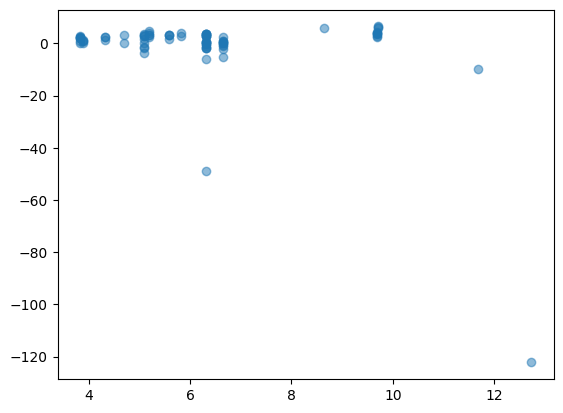

In [963]:
plt.scatter(x=y_pred,y=residual,alpha=0.5)

Large residuals may indicate outliers

In [969]:
res=pd.DataFrame({'pred':y_pred,'actual':y_test})
res

,pred,actual
289,6.311097,2.54
60,3.836493,1.30
255,6.311097,2.52
37,5.089071,2.20
303,9.685714,5.77
...,...,...
170,3.892805,3.60
215,9.685714,7.11
97,5.581560,3.72
423,6.311097,3.31


<Axes: ylabel='yield_strain'>

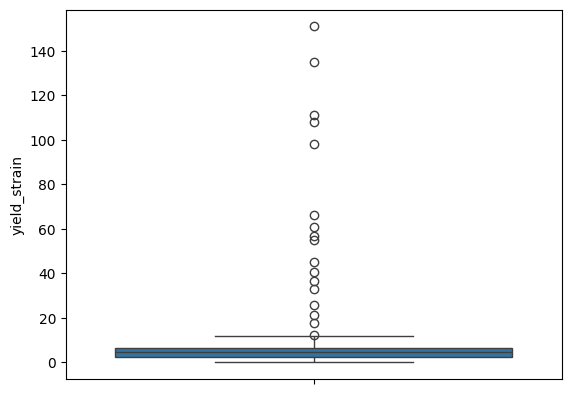

In [1082]:
sns.boxplot(temp.yield_strain)

<Axes: ylabel='yield_strain'>

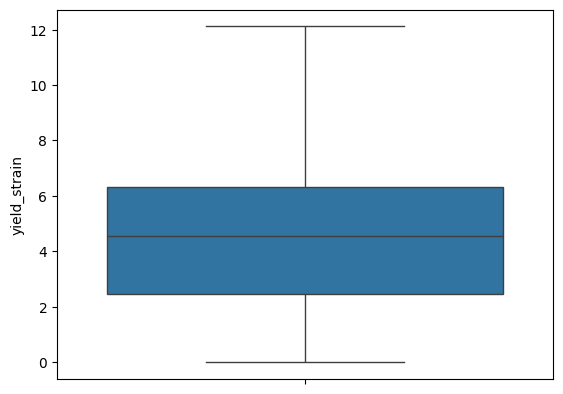

In [1083]:
Q1 = np.percentile(temp.yield_strain, 25)
Q3 = np.percentile(temp.yield_strain, 75)

IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
temp.yield_strain.clip(upper=upper_bound)

sns.boxplot(temp.yield_strain.clip(upper=upper_bound))


In [1086]:
boost(x,temp.yield_strain.clip(upper=upper_bound))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best RMSE: 1.9765410069473788
Mean Squared Error: 4.4683958476025305
R-squared: 0.44312215399929455


Clipping the outliers helped the model perform better

In [1087]:
x=df[features]
y=temp.yield_strain.clip(upper=upper_bound)

In [1088]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
xgb_reg = XGBRegressor()

param_grid = {
'n_estimators': [100, 200, 300],
'max_depth': [3, 5, 7],
'learning_rate': [0.01, 0.1, 0.2]}

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

best_xgb_reg = XGBRegressor(**best_params)
best_xgb_reg.fit(X_train, y_train)

y_pred = best_xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
# return best_xgb_reg

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best RMSE: 1.9765410069473788
Mean Squared Error: 4.4683958476025305
R-squared: 0.44312215399929455


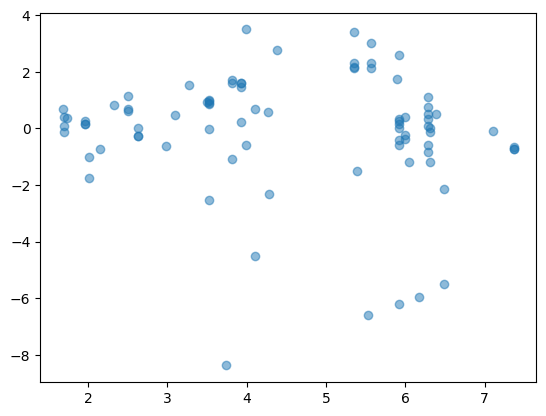

In [1089]:
residual=y_pred-y_test
plt.scatter(x=y_pred,y=residual,alpha=0.5)

the data points are more spread across compared to the previous chart but are not random

In [1095]:
x=df[features]
y=temp.yield_strain.clip(upper=upper_bound)
pt = PowerTransformer(method='yeo-johnson')
y= pt.fit_transform((y.values.reshape(-1, 1)))

In [1102]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
xgb_reg = XGBRegressor()

param_grid = {
'n_estimators': [100, 200, 300],
'max_depth': [3, 5, 7],
'learning_rate': [0.01, 0.1, 0.2]}

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

best_xgb_reg = XGBRegressor(**best_params)
best_xgb_reg.fit(X_train, y_train)

y_pred = best_xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
# return best_xgb_reg

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best RMSE: 0.5930473533574675
Mean Squared Error: 0.38340618464931997
R-squared: 0.6050907870719102


Transforming the target variable values further helped the model perfrom better